In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import random

Let's explore this airline datset:

In [13]:
df = pd.read_csv('data/airlines.csv')
df.head()

,Airline,Mishandled baggage (per 1000 passengers),Percentage On Time Arrivals
0,American West,4.36,81.9
1,United,4.00,80.9
2,Southwest,4.42,78.4
3,US Airways,7.16,78.3
4,Continental,4.62,75.7


View the scatterplot:

Text(0, 0.5, 'Percentage On Time Arrivals')

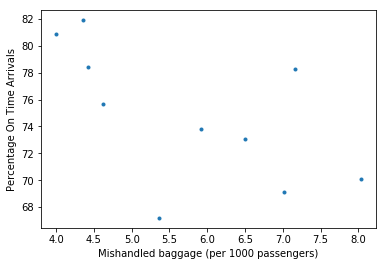

In [14]:
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']
plt.plot(X, Y, '.')
plt.xlabel('Mishandled baggage (per 1000 passengers)')
plt.ylabel('Percentage On Time Arrivals')

Let's run a linear regression model:

In [27]:
# Create an empty model
model = LinearRegression()
# Choose the response variable, which in this case is y
y = df['Percentage On Time Arrivals']
# Choose the predictor variable, which in this case is X:
X=df.drop(['Airline', 'Percentage On Time Arrivals'], axis=1)
# Fit the model to the full dataset
model.fit(X, y)
# print out intercept
print('b: ', model.intercept_)
# print out other coefficients
print('m: ', model.coef_)

b:  87.20288782505382
m:  [-2.15244604]


Watch these videos by Andrew Ng on Gradient Descent.

https://www.coursera.org/learn/machine-learning/lecture/8SpIM/gradient-descent

https://www.coursera.org/learn/machine-learning/lecture/GFFPB/gradient-descent-intuition


Finally, watch the following video, paying special attention to the formulas explained between 0:00 and 4:30:

https://www.coursera.org/lecture/machine-learning/gradient-descent-for-linear-regression-kCvQc

<img src="images/gradient1.png" width=500>
<img src="images/gradient2.png" width=500>

### Exercise: Gradient Descent
Write a function called gradient_descent that takes in an input array, X, and output array, Y, a learning rate, alpha, and a tolerance, tol, and prints the $\theta_0$ and $\theta_1$ values obtained by the algorithm above. 


For example, if
```
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']
```
then 
```gradient_descent(X,Y,0.05,0.0001)```
should give us out:

b (theta0) = 87.16301264227455 and m (theta1) = -2.1458406529174456

b:87.16301264227455, m:-2.1458406529174456


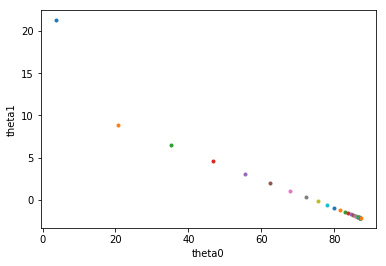

In [32]:
def gradient_descent(X, Y, alpha, tol):
    
    theta0, theta1 = 0, 0           # initial guesses
    theta0_temp, theta1_temp = 1, 1 # so we can compare previous and new values
                                    # make sure they are different than theta0, theta1 at the start
    m = len(X)
    j=0
    while(np.sqrt((theta0_temp - theta0)**2+(theta1_temp - theta1)**2) > tol):
        
        theta0_temp = theta0
        theta1_temp = theta1
        theta0_deriv = 0
        theta1_deriv = 0

        for i in range(m):
            theta0_deriv += theta0+theta1*X[i]-Y[i]
            theta1_deriv += (theta0+theta1*X[i]-Y[i])*X[i]
            
        theta0 = theta0-alpha*theta0_deriv/m
        theta1 = theta1-alpha*theta1_deriv/m
        
        if j % 100 == 0:
            plt.plot(theta0,theta1,'.')
        j = j + 1

    print(f"b:{theta0}, m:{theta1}")
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    
    
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']

gradient_descent(X,Y,0.05,0.0001)

Hints for students

def gradient_descent(X, Y, alpha, tol):
    
    #make initial guess for theta0,theta1
    #make initial guess for theta0_temp,theta1_temp # (make sure guesses are different than the line above)

    #while the difference between those points is greater than tolerance:
        
        #theta0_temp = theta0 (update the temp variables)
        #theta1_temp = theta1

        #update theta0, theta1 using a FOR loop or some sort of summation
        
    print(f"b:{theta0}, m:{theta1}")

    
    
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']

gradient_descent(X,Y,0.05,0.0001)

### Stochastic Gradient Descent

In [3]:
df = pd.read_csv('data/airlines.csv')
df.head()

,Airline,Mishandled baggage (per 1000 passengers),Percentage On Time Arrivals
0,American West,4.36,81.9
1,United,4.00,80.9
2,Southwest,4.42,78.4
3,US Airways,7.16,78.3
4,Continental,4.62,75.7


In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Airline,Mishandled baggage (per 1000 passengers),Percentage On Time Arrivals
0,Delta,8.03,70.1
1,United,4.00,80.9
2,Alaska,7.02,69.1
3,American,6.50,73.1
4,US Airways,7.16,78.3


b:87.1433414255368, m:-2.2539330377084883


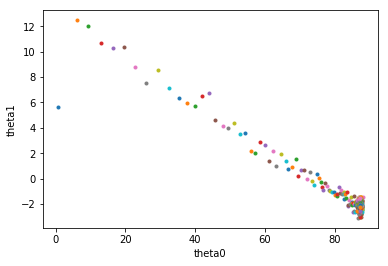

In [3]:
def gradient_descent(X, Y, alpha, tol):
    
    theta0, theta1 = 0, 0           # initial guesses
    theta0_temp, theta1_temp = 1, 1 # so we can compare previous and new values
                                    # make sure they are different than theta0, theta1 at the start
    m = len(X)
    j = 0
    while(np.sqrt((theta0_temp - theta0)**2+(theta1_temp - theta1)**2) > tol):
        
        theta0_temp = theta0
        theta1_temp = theta1
        theta0_deriv = 0
        theta1_deriv = 0
        
        index = random.randint(0,len(X)-1)
        
        theta0_deriv += theta0+theta1*X[index]-Y[index]
        theta1_deriv += (theta0+theta1*X[index]-Y[index])*X[index]
            
        theta0 = theta0-alpha*theta0_deriv
        theta1 = theta1-alpha*theta1_deriv
        
        
        if j % 100 == 0:
            plt.plot(theta0,theta1,'.')
        j = j + 1

    print(f"b:{theta0}, m:{theta1}")
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    
    
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']

gradient_descent(X,Y,.01,0.00001)